<a href="https://colab.research.google.com/github/amitav710/BNNusingMCMC/blob/main/BNNusingMCMC_96_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import math

Generating our Noisy XOR Dataset

In [2]:
x1_train=np.random.random(5000)
x2_train=np.random.random(5000)
x1_test=np.random.random(1000)
x2_test=np.random.random(1000)

In [4]:
y_train=[]
for i in range(5000):
  if((x1_train[i]>0.5 and x2_train[i]>0.5) or (x1_train[i]<0.5 and x2_train[i]<0.5)):
    y_train.append(0)
  else:
    y_train.append(1)

In [5]:
y_train=np.array(y_train)

In [6]:
type(y_train)

numpy.ndarray

In [7]:
len(y_train)

5000

In [8]:
y_test=[]
for i in range(1000):
  if((x1_test[i]>0.5 and x2_test[i]>0.5) or (x1_test[i]<0.5 and x2_test[i]<0.5)):
    y_test.append(0)
  else:
    y_test.append(1)

In [9]:
y_test=np.array(y_test)

In [10]:
len(y_test)

1000

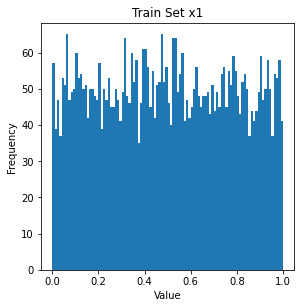

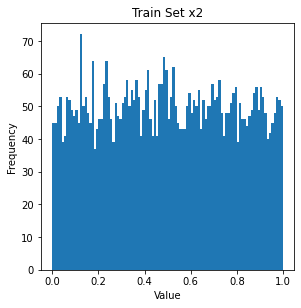

In [11]:
fig1=plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(2,2,2)
ax1.hist(x1_train,bins=100)
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")
ax1.set_title("Train Set x1")
x1_mean=x1_train.mean()
fig2=plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(2,2,2)
ax2.hist(x2_train,bins=100)
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")
ax2.set_title("Train Set x2")
x2_mean=x2_train.mean()

In [12]:
x1_train.shape

(5000,)

In [13]:
x1_train=x1_train.reshape(5000,1)

In [14]:
x1_train

array([[0.76543825],
       [0.92620536],
       [0.20754329],
       ...,
       [0.41484437],
       [0.52394109],
       [0.03355488]])

In [15]:
x2_train=x2_train.reshape(5000,1)

In [16]:
x2_train

array([[0.91872689],
       [0.76115338],
       [0.46039818],
       ...,
       [0.49171072],
       [0.80249702],
       [0.1652262 ]])

In [17]:
train_set = np.concatenate((x1_train,x2_train), axis=1)

In [18]:
train_set

array([[0.76543825, 0.91872689],
       [0.92620536, 0.76115338],
       [0.20754329, 0.46039818],
       ...,
       [0.41484437, 0.49171072],
       [0.52394109, 0.80249702],
       [0.03355488, 0.1652262 ]])

In [19]:
train_set.shape

(5000, 2)

In [20]:
type(train_set)

numpy.ndarray

In [21]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=25)

Defining Important Functions

In [22]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [23]:
def prior(theta, mu=0, sigma=1):
  theta=np.array(theta)
  p=0
  for t in theta:
    p+=np.sum(-(t**2)/2)
  return p

In [24]:
def log_likelihood(y:np.ndarray,y_pred:np.ndarray):
  y_pred = y_pred.squeeze()
  #print(np.sum(-np.log(0.5 * np.sqrt(2* np.pi) )-((y-y_pred)**2)))
  return np.sum(-np.log(0.5 * np.sqrt(2* np.pi) )-((y-y_pred)**2))

In [25]:
def likelihood(y:np.ndarray,y_pred:np.ndarray):
  return np.exp(log_likelihood(y,y_pred))

In [26]:
def Q(theta_n):
  W=[]
  for w in theta_n:
    W.append(np.random.normal(loc=w,size=w.shape))
  return W

Creating our Functional Model

In [27]:
class BNN():
  def __init__(self):
    self.theta=[np.random.randn(2,4), np.random.randn(1,4), np.random.randn(4,1), np.random.randn(1,1)]
  def __call__(self, x:np.ndarray, wts):
    x=x@wts[0]+wts[1]
    x=sigmoid(x)
    x=x@wts[2]+wts[3]
    x=sigmoid(x)
    return x

In [28]:
network = BNN()

In [149]:
def MetropolisHasting(training_data,training_labels,epoch):
  accepted_set=[]
  x,y = training_data,training_labels
  w=network.theta
  for i in range(epoch):
    # print(w)
    w_dash=Q(w)
    # print(w_dash)
    y_pred=network(x,w)
    #print(y_pred)
    y_dash_pred=network(x,w_dash)
    w_dash_likelihood = log_likelihood(y,y_dash_pred)
    w_likelihood = log_likelihood(y,y_pred)
    w_dash_prior=prior(w)
    w_prior=prior(w)
    ratio=(w_dash_likelihood+w_dash_prior)-(w_likelihood+w_prior)-10

    print(ratio)
    if (ratio>=0):
      w=w_dash
      accepted_set.append(w_dash)
    else:
      k=np.random.binomial(1,math.exp(ratio))
      if(k):
        w=w_dash
        accepted_set.append(w_dash)
  return accepted_set

In [150]:
accepted=MetropolisHasting(train_set,y_train,30000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Streaming output truncated to the last 5000 lines.
-1747.0517019403085
-455.76389939392334
-1552.4641809596167
-992.1737933118568
-696.6742320763008
-1389.1533783118214
-1143.4142782369179
-915.7218010563486
-1177.247265746976
-1050.8046738449018
-1095.6611584749646
-1727.4266482502055
-583.0518226062452
-611.1739016569024
-829.661987347434
-1040.2999707624833
-974.3263268112353
-1972.087711412488
-1012.7725770543741
-1084.8810551913527
-1215.7858524699711
-754.0656824736282
-634.5080294141205
-1196.7180308154032
-1555.017014491433
-1125.1444905699093
-1010.2947807702046
-1691.884904054483
-1236.4428466598276
-1009.2312113064866
-1078.9256134133186
-1353.1684319168019
-938.3491037807928
-1348.9265302360043
-245.67373873196925
-937.2692648557934
-603.371141832253
-946.8883580845861
-855.4559825157414
-1213.2689891914818
-1551.2399462115175
-135.98773995648344
-465.4933042779387
-362.1208261025306
-1069.2874204845937
-265.64009622288427
-301.16953763063907
-453.75487686988777
-547.405413

In [151]:
len(accepted)

31

In [254]:
new_accepted=[]
for i in range(len(accepted)-4,len(accepted)):
  new_accepted.append(accepted[i])


In [255]:
len(new_accepted)

4

In [256]:
x1_test=x1_test.reshape(1000,1)

In [257]:
x2_test=x2_test.reshape(1000,1)

In [258]:
x_test = np.concatenate((x1_test,x2_test), axis=1)

In [259]:
x_test

array([[0.72991882, 0.51342613],
       [0.939776  , 0.76226264],
       [0.94091916, 0.89602479],
       ...,
       [0.73442816, 0.99427346],
       [0.47104853, 0.24059677],
       [0.18117495, 0.30507553]])

In [260]:
x_test.shape

(1000, 2)

In [261]:
type(x_test)

numpy.ndarray

In [262]:
correct=0
for (x,y) in zip(x_test,y_test):
  y_pred=0
  for theta in new_accepted:
    output = network(x,theta)
    y_pred+=output.item()
  y_hat=y_pred/len(new_accepted)
  if y_hat<0.5:
    y_hat=0
  else:
    y_hat=1
  if y_hat==y:
    correct+=1

In [263]:
y_test.shape

(1000,)

In [264]:
accuracy = correct/len(y_test)
print(accuracy)

0.962
